In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit

In [5]:

@jit(nopython=True)
def run_bandit_process(total_steps, arms_count, eps, lr):
    est_true = np.zeros(arms_count)
    est_q = np.zeros(arms_count)
    arm_hits = np.zeros(arms_count)

    reward_log = np.zeros(total_steps)
    best_action_log = np.zeros(total_steps)

    for t in range(total_steps):
        est_true += 0.01 * np.random.randn(arms_count)

        if np.random.random() < eps:
            chosen_arm = np.random.randint(arms_count)
        else:
            chosen_arm = np.argmax(est_q)

        gained = np.random.normal(est_true[chosen_arm], 1)

        arm_hits[chosen_arm] += 1
        est_q[chosen_arm] += lr * (gained - est_q[chosen_arm])

        reward_log[t] = gained
        best_action_log[t] = 1 if chosen_arm == np.argmax(est_true) else 0

    return reward_log, best_action_log


In [6]:
def execute_trials(step_count=100000, trial_count=30, arm_count=10, eps=0.1, lr=0.1):
    reward_matrix = np.zeros((trial_count, step_count))
    optimal_matrix = np.zeros((trial_count, step_count))

    for trial_idx in tqdm(range(trial_count), desc="Processing runs"):
        r_seq, opt_seq = run_bandit_process(step_count, arm_count, eps, lr)
        reward_matrix[trial_idx] = r_seq
        optimal_matrix[trial_idx] = opt_seq

    return reward_matrix, optimal_matrix

Processing runs: 100%|██████████| 30/30 [00:02<00:00, 10.69it/s]


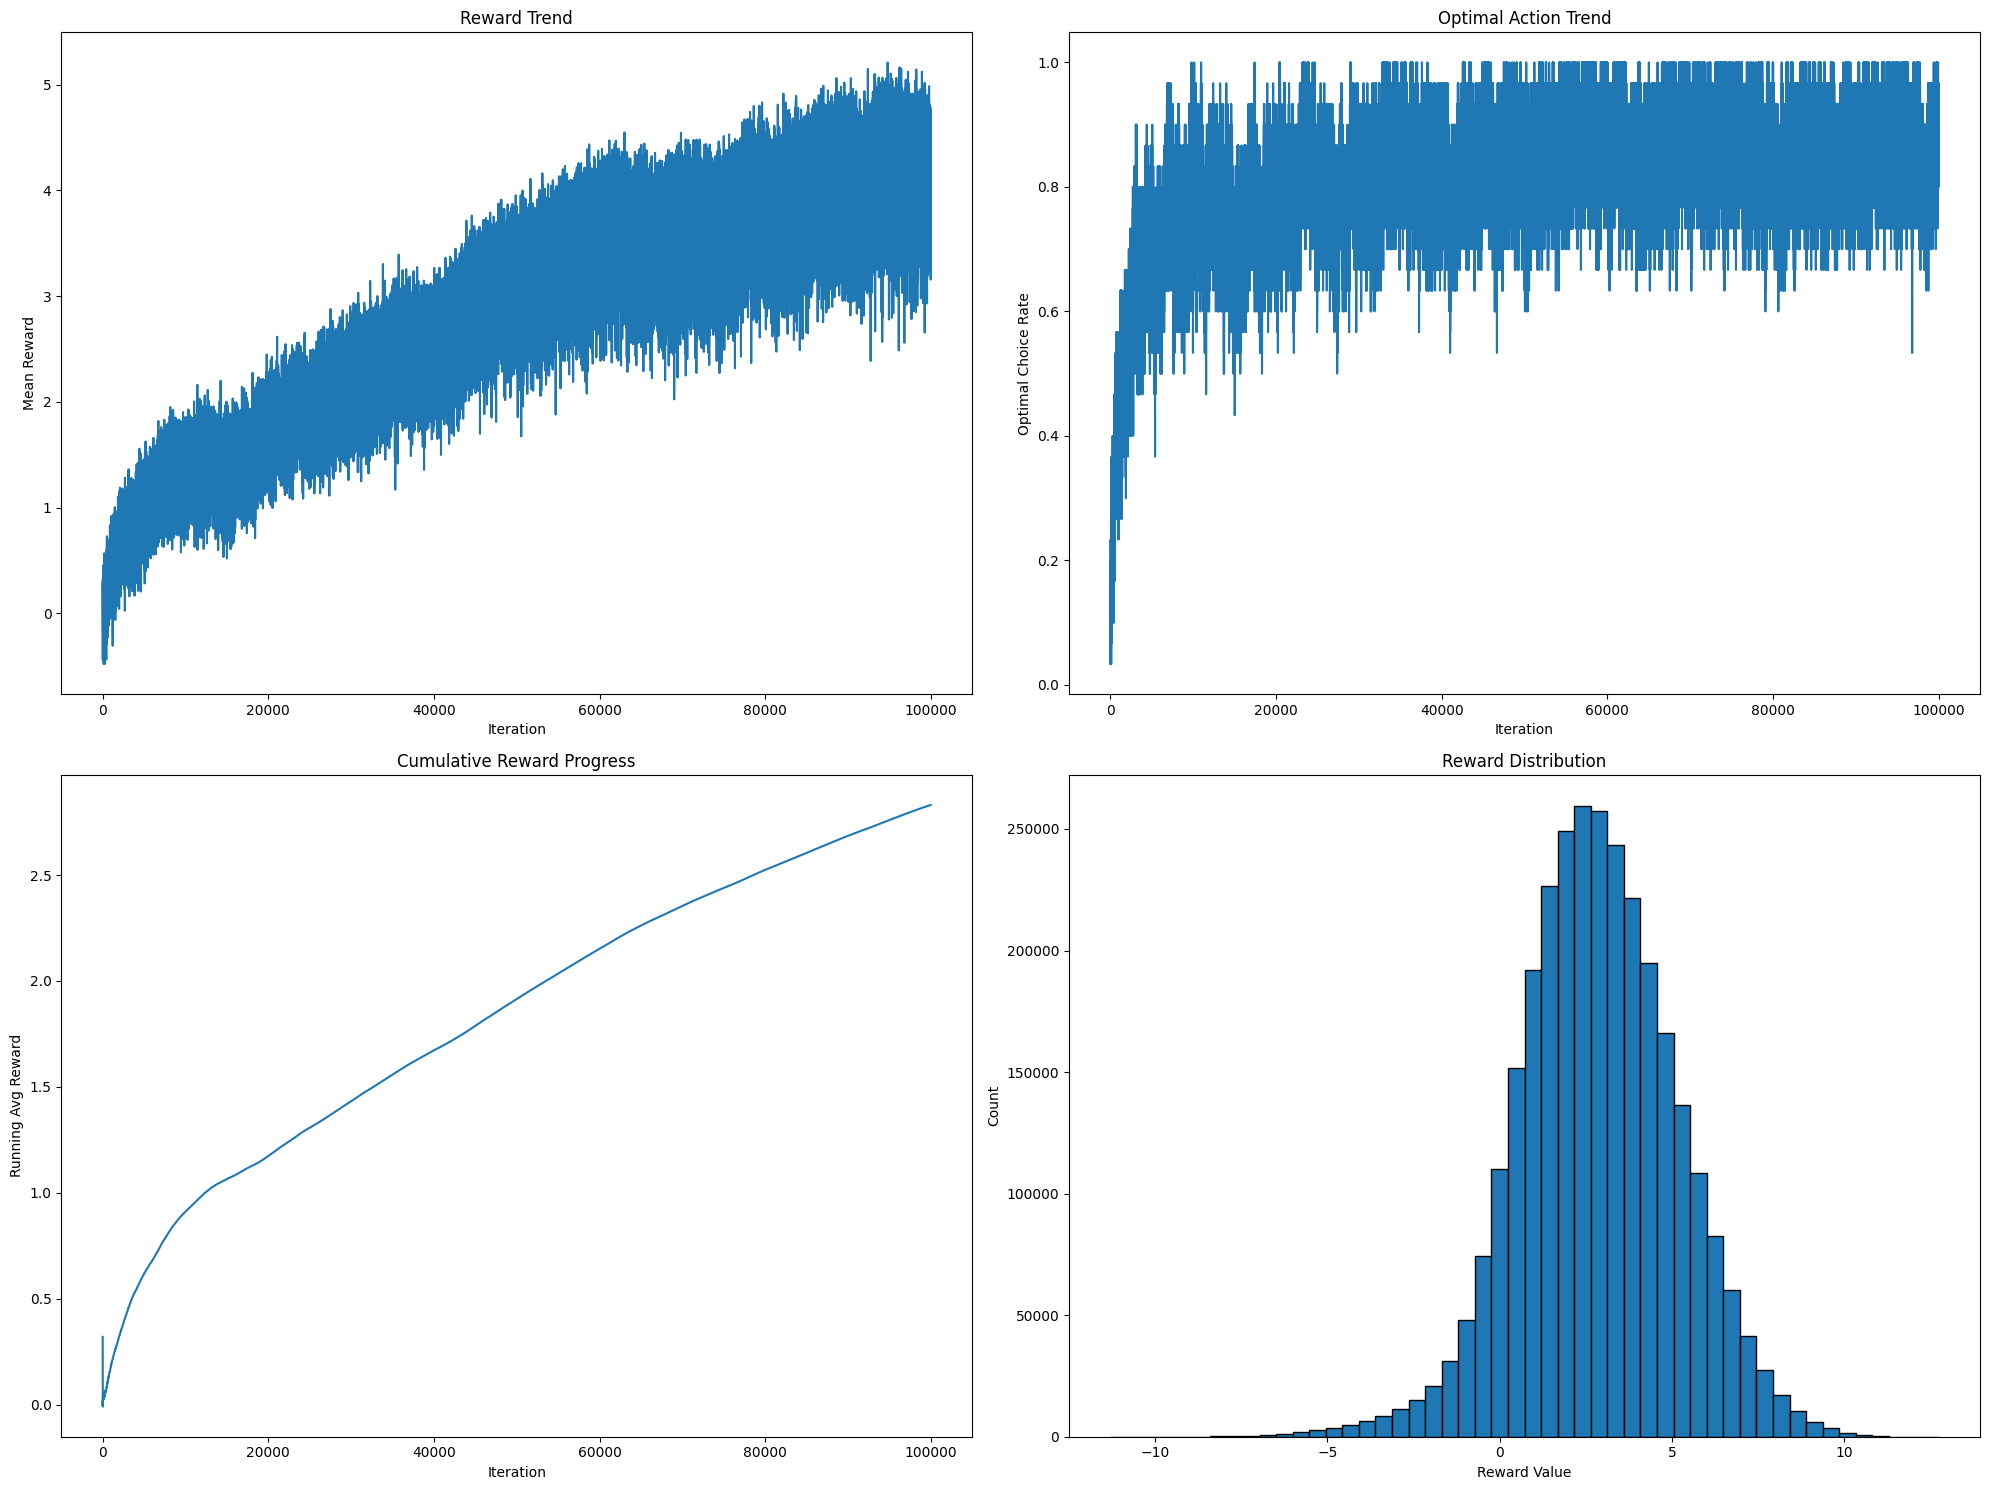

Overall mean reward: 2.8312
Average optimal action rate: 82.78%
Final running average reward: 2.8312


In [7]:
steps_total = 100000
trial_total = 30

reward_set, opt_set = execute_trials(steps_total, trial_total)

mean_reward = np.mean(reward_set, axis=0)
mean_optimal = np.mean(opt_set, axis=0)
running_mean_reward = np.cumsum(mean_reward) / (np.arange(steps_total) + 1)

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(mean_reward)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Reward Trend')

plt.subplot(2, 2, 2)
plt.plot(mean_optimal)
plt.xlabel('Iteration')
plt.ylabel('Optimal Choice Rate')
plt.title('Optimal Action Trend')

plt.subplot(2, 2, 3)
plt.plot(running_mean_reward)
plt.xlabel('Iteration')
plt.ylabel('Running Avg Reward')
plt.title('Cumulative Reward Progress')

plt.subplot(2, 2, 4)
plt.hist(reward_set.ravel(), bins=50, edgecolor='black')
plt.xlabel('Reward Value')
plt.ylabel('Count')
plt.title('Reward Distribution')

plt.tight_layout()
plt.show()

print(f"Overall mean reward: {np.mean(mean_reward):.4f}")
print(f"Average optimal action rate: {np.mean(mean_optimal) * 100:.2f}%")
print(f"Final running average reward: {running_mean_reward[-1]:.4f}")
